In [ ]:
#%%

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from functions import load_data, load_datasets, VectorizerWrapper, analyze_model, meta_grid_search, write_to_file, print_scores

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

import copy

In [ ]:
#%%

vectorizer_name = "tfidf"
vectorizer = VectorizerWrapper(vectorizer_name=vectorizer_name)

train_data, val_data, test_data = load_datasets(vectorizer_name=vectorizer_name)

X_train = vectorizer.fit_transform(train_data['tweet'], max_features=20000, max_df=0.8)

# Transform the validation and test data
X_val = vectorizer.transform(val_data['tweet'])
X_test = vectorizer.transform(test_data['tweet'])
train_labels = train_data['label']
val_labels = val_data['label']
test_labels = test_data['label']

#%% [markdown]

## As the grid search yielded tf-idf vectorizer being the one with the highes f1-score this model is used to run it on a full scale

#%% [markdown]

### Grid search across max_features and max_df

In [ ]:
#%% 

vectorizer_name = "tfidf"
vectorizer = VectorizerWrapper(vectorizer_name=vectorizer_name)
model = LogisticRegression(multi_class="multinomial", penalty="l1", solver="saga", max_iter=1000)

max_features_ls, max_df_ls = [1000, 5000, 7000, 12000, 20000, 30000], [0.3, 0.5, 0.6, 0.8, 0.9, 0.95]
print(vectorizer_name + ", max_features:" + str(max_features_ls) + ", max_df:" + str(max_df_ls))

highest_score = 0
best_features = {}
results_ls = []
for max_features in max_features_ls:
    for max_df in max_df_ls: 
        vect_tmp = copy.deepcopy(vectorizer)
        model_tmp = copy.deepcopy(model)

        print("fitting a model for: max_features: {} max_df: {}".format(max_features, max_df))

        X_train = vect_tmp.fit_transform(train_data['tweet'], max_features=max_features, max_df=max_df)
        X_val = vect_tmp.transform(val_data['tweet'])
        X_test = vect_tmp.transform(test_data['tweet'])
        model_tmp.fit(X_train, train_data['label'])

        train_pred = model_tmp.predict(X_train)
        print_scores(s="train", y_true=train_labels, y_pred=train_pred)

        results = analyze_model(model=model_tmp, X_val=X_val, val_labels=val_labels, X_test=X_test, test_labels=test_labels, plot_conf_mats=False)
        cur_score = results.get("val_f1")
        if cur_score > highest_score:
            highest_score = cur_score
            best_features = {'max_features': max_features, 'max_df': max_df}
        results_ls.append([max_features, max_df, results])

tfidf, max_features:[1000, 5000, 7000, 12000, 20000, 30000], max_df:[0.3, 0.5, 0.6, 0.8, 0.9, 0.95]
fitting a model for: max_features: 1000 max_df: 0.3
Printing results for the model for train
train F1: 0.64
train Accuracy: 0.66
train Recall: 0.66
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.64
Validation Accuracy: 0.65
Validation Recall: 0.65
Test F1: 0.53
Test Accuracy: 0.55
Validation Recall: 0.55
fitting a model for: max_features: 1000 max_df: 0.5
Printing results for the model for train
train F1: 0.64
train Accuracy: 0.66
train Recall: 0.66
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.64
Validation Accuracy: 0.65
Validation Recall: 0.65
Test F1: 0.53
Test Accuracy: 0.55
Validation Recall: 0.55
fitting a model for: max_features: 1000 max_df: 0.6
Printing results for the model for train
train F1: 0.64
train Accuracy: 0.66
train Recall: 0.66
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.64
Valida

In [ ]:
#%%

print(highest_score)
print(best_features)

for result in results_ls:
    print(result)

0.6742852312530834
{'max_features': 7000, 'max_df': 0.3}
[1000, 0.3, {'test_accuracy': 0.5546239010094431, 'test_f1': 0.5314880965353488, 'test_recall': 0.5546239010094431, 'val_accuracy': 0.6465, 'val_f1': 0.6363038838296825, 'val_recall': 0.6465}]
[1000, 0.5, {'test_accuracy': 0.5546239010094431, 'test_f1': 0.5314880965353488, 'test_recall': 0.5546239010094431, 'val_accuracy': 0.6465, 'val_f1': 0.6363038838296825, 'val_recall': 0.6465}]
[1000, 0.6, {'test_accuracy': 0.5546239010094431, 'test_f1': 0.5314880965353488, 'test_recall': 0.5546239010094431, 'val_accuracy': 0.6465, 'val_f1': 0.6363038838296825, 'val_recall': 0.6465}]
[1000, 0.8, {'test_accuracy': 0.5547053077173559, 'test_f1': 0.5316006503698989, 'test_recall': 0.5547053077173559, 'val_accuracy': 0.6465, 'val_f1': 0.6363038838296825, 'val_recall': 0.6465}]
[1000, 0.9, {'test_accuracy': 0.5545424943015305, 'test_f1': 0.5313744042547743, 'test_recall': 0.5545424943015305, 'val_accuracy': 0.6465, 'val_f1': 0.6363038838296825, '

In [ ]:
#%% 

vectorizer_name = "tfidf"
vectorizer = VectorizerWrapper(vectorizer_name=vectorizer_name)
train_data, val_data, test_data = load_datasets(vectorizer_name=vectorizer_name)
model = LogisticRegression(multi_class="multinomial", penalty="l1", solver="saga", max_iter=1000)

max_features_ls, max_df_ls = [1000, 5000, 7000, 12000, 20000, 30000], [0.05, 0.1, 0.2]
print(vectorizer_name + ", max_features:" + str(max_features_ls) + ", max_df:" + str(max_df_ls))

highest_score = 0
best_features = {}
results_ls = []
for max_features in max_features_ls:
    for max_df in max_df_ls: 
        vect_tmp = copy.deepcopy(vectorizer)
        model_tmp = copy.deepcopy(model)

        print("fitting a model for: max_features: {} max_df: {}".format(max_features, max_df))

        X_train = vect_tmp.fit_transform(train_data['tweet'], max_features=max_features, max_df=max_df)
        X_val = vect_tmp.transform(val_data['tweet'])
        X_test = vect_tmp.transform(test_data['tweet'])
        model_tmp.fit(X_train, train_data['label'])

        train_pred = model_tmp.predict(X_train)
        print_scores(s="train", y_true=train_labels, y_pred=train_pred)

        results = analyze_model(model=model_tmp, X_val=X_val, val_labels=val_labels, X_test=X_test, test_labels=test_labels, plot_conf_mats=False)
        cur_score = results.get("val_f1")
        if cur_score > highest_score:
            highest_score = cur_score
            best_features = {'max_features': max_features, 'max_df': max_df}
        results_ls.append([max_features, max_df, results])

tfidf, max_features:[1000, 5000, 7000, 12000, 20000, 30000], max_df:[0.05, 0.1, 0.2]
fitting a model for: max_features: 1000 max_df: 0.05
Printing results for the model for train
train F1: 0.64
train Accuracy: 0.65
train Recall: 0.65
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.63
Validation Accuracy: 0.64
Validation Recall: 0.64
Test F1: 0.52
Test Accuracy: 0.55
Validation Recall: 0.55
fitting a model for: max_features: 1000 max_df: 0.1
Printing results for the model for train
train F1: 0.64
train Accuracy: 0.66
train Recall: 0.66
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.63
Validation Accuracy: 0.64
Validation Recall: 0.64
Test F1: 0.53
Test Accuracy: 0.55
Validation Recall: 0.55
fitting a model for: max_features: 1000 max_df: 0.2
Printing results for the model for train
train F1: 0.65
train Accuracy: 0.66
train Recall: 0.66
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.64
Validation Accuracy:

In [ ]:
#%%

print(highest_score)
print(best_features)

for result in results_ls:
    print(result)

0.6742852312530834
{'max_features': 7000, 'max_df': 0.2}
[1000, 0.05, {'test_accuracy': 0.5493324649951156, 'test_f1': 0.5199896338380146, 'test_recall': 0.5493324649951156, 'val_accuracy': 0.638, 'val_f1': 0.6262772206413464, 'val_recall': 0.638}]
[1000, 0.1, {'test_accuracy': 0.553484207098665, 'test_f1': 0.5293964541622589, 'test_recall': 0.553484207098665, 'val_accuracy': 0.641, 'val_f1': 0.6309172334747185, 'val_recall': 0.641}]
[1000, 0.2, {'test_accuracy': 0.5546239010094431, 'test_f1': 0.5314880965353488, 'test_recall': 0.5546239010094431, 'val_accuracy': 0.6465, 'val_f1': 0.6363038838296825, 'val_recall': 0.6465}]
[5000, 0.05, {'test_accuracy': 0.5823021816997721, 'test_f1': 0.5621111209239125, 'test_recall': 0.5823021816997721, 'val_accuracy': 0.675, 'val_f1': 0.6676806105825699, 'val_recall': 0.675}]
[5000, 0.1, {'test_accuracy': 0.5881634646694888, 'test_f1': 0.5705534874839665, 'test_recall': 0.5881634646694888, 'val_accuracy': 0.676, 'val_f1': 0.6696647166005064, 'val_rec

#%% [markdown]

### Fitting the final model

In [ ]:
#%%

vectorizer_name = "tfidf"
vectorizer = VectorizerWrapper(vectorizer_name=vectorizer_name)

In [ ]:
#%%

# Create and train the Logistic Regression model with different number of features
model = LogisticRegression(multi_class="multinomial", penalty="l1", solver="saga", max_iter=1000)

max_features, max_df = 7000, 0.2
print(vectorizer_name + ", max_features:" + str(max_features) + ", max_df:" + str(max_df))

X_train = vectorizer.fit_transform(train_data['tweet'], max_features=max_features, max_df=max_df)
X_val = vectorizer.transform(val_data['tweet'])
X_test = vectorizer.transform(test_data['tweet'])

model.fit(X_train, train_data['label'])

tfidf, max_features:7000, max_df:0.2


LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   solver='saga')

Printing results for the model for train
train F1: 0.71
train Accuracy: 0.72
train Recall: 0.72
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.67
Validation Accuracy: 0.68
Validation Recall: 0.68
Confusion matrix, without normalization- for val data
[[123 150  39]
 [ 45 681 143]
 [ 11 251 557]]
Normalized confusion matrix- for val data
[[0.39423077 0.48076923 0.125     ]
 [0.05178366 0.78365938 0.16455696]
 [0.01343101 0.30647131 0.68009768]]


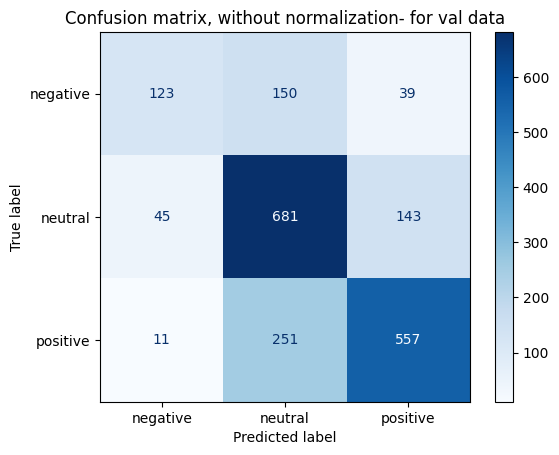

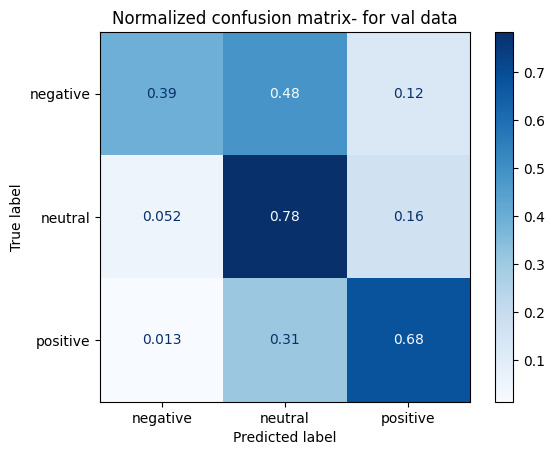

Test F1: 0.58
Test Accuracy: 0.59
Validation Recall: 0.59
Confusion matrix, without normalization- for test data
[[1377 2270  325]
 [ 509 4674  754]
 [  95 1036 1244]]
Normalized confusion matrix- for test data
[[0.34667674 0.5715005  0.08182276]
 [0.08573354 0.7872663  0.12700017]
 [0.04       0.43621053 0.52378947]]


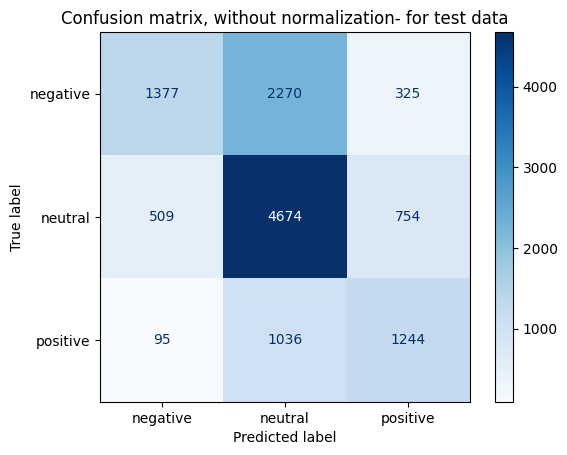

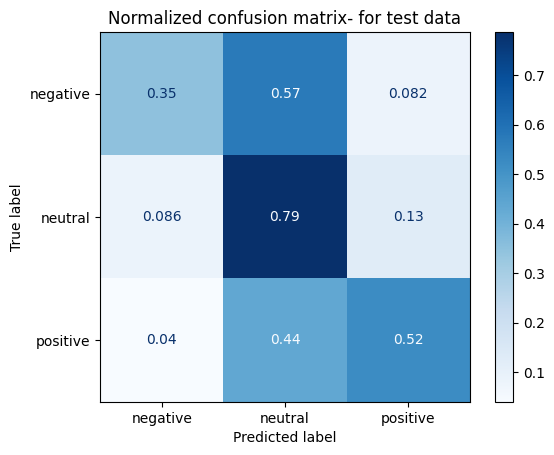

{'test_accuracy': 0.59386193422338, 'test_f1': 0.5766178266340527, 'test_recall': 0.59386193422338, 'val_accuracy': 0.6805, 'val_f1': 0.6742852312530834, 'val_recall': 0.6805}


In [ ]:
#%%

train_pred = model.predict(X_train)
print_scores(s="train", y_true=train_labels, y_pred=train_pred)

results = analyze_model(model=model, X_val=X_val, val_labels=val_labels, X_test=X_test, test_labels=test_labels)

print(results)